### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


### Loading the data set

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['date']=pd.to_datetime(df['date']) # this is done to make date a timestamp object rather than a string object

### Feature extraction 

In [5]:
df['year']=df['date'].apply(lambda date: date.year)   
# The above steps is done for feature extraction of the year and month from the year object
df['month']=df['date'].apply(lambda date: date.month)


### Dropping unnecessary columns( As they won't influence the prediction)





In [6]:
X=df.drop('id',axis='columns')
# This and the following 3 steps are done so that unnessary columns are dropped

In [7]:
X=X.drop('date',axis='columns')


In [8]:
X=X.drop('zipcode',axis=1)


In [9]:
X=X.drop('price',axis=1)
X=X.values
X # Since a tensor flow model takes only matrix, the dataframe is converted to np array in this step

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [10]:
y=df['price'].values
y # y values of the dataframe is converted to np array


array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

### Splitting the data into training and test data

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)  
# This is famous train test split

In [12]:
X_train

array([[4.0000e+00, 1.0000e+00, 2.2900e+03, ..., 6.3000e+03, 2.0140e+03,
        9.0000e+00],
       [3.0000e+00, 2.2500e+00, 1.6300e+03, ..., 3.1310e+03, 2.0140e+03,
        6.0000e+00],
       [4.0000e+00, 3.5000e+00, 2.8500e+03, ..., 5.7080e+03, 2.0150e+03,
        5.0000e+00],
       ...,
       [2.0000e+00, 1.7500e+00, 1.8000e+03, ..., 7.4000e+03, 2.0150e+03,
        4.0000e+00],
       [3.0000e+00, 2.0000e+00, 1.5000e+03, ..., 1.4013e+04, 2.0150e+03,
        4.0000e+00],
       [2.0000e+00, 1.0000e+00, 1.1600e+03, ..., 5.0760e+03, 2.0150e+03,
        1.0000e+00]])

### Normalising the data between 0 and 1 (So that learning can be sped up)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() 
# we would train our model on normalised data between 0 and 1 and that is why this is done

In [14]:
X_train=scaler.fit_transform(X_train)


In [15]:
X_test=scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential() #model reference is created

### Creating a model with 5 layers and rectified linear unit activation function

In [17]:
model.add(Dense(19,activation='linear'))
model.add(Dense(30,activation='linear'))
model.add(Dense(30,activation='linear'))
model.add(Dense(30,activation='relu'))   # model is created with no of layer and optimizer defined
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse') 

### Training and fitting the model on the data 

In [18]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=800) # this is done so that loss function on test data is evaluated all along

Epoch 1/400
473/473 [==============================] - 2s 3ms/step - loss: 393676.5625 - val_loss: 180200.7969
Epoch 2/400
473/473 [==============================] - 1s 2ms/step - loss: 179858.3594 - val_loss: 169832.2031
Epoch 3/400
473/473 [==============================] - 2s 4ms/step - loss: 168702.3125 - val_loss: 158307.2656
Epoch 4/400
473/473 [==============================] - 2s 4ms/step - loss: 155801.5938 - val_loss: 143583.2188
Epoch 5/400
473/473 [==============================] - 2s 5ms/step - loss: 140922.8438 - val_loss: 129595.1875
Epoch 6/400
473/473 [==============================] - 2s 4ms/step - loss: 130878.3516 - val_loss: 124489.7891
Epoch 7/400
473/473 [==============================] - 2s 4ms/step - loss: 127074.2266 - val_loss: 122380.8516
Epoch 8/400
473/473 [==============================] - 2s 5ms/step - loss: 125188.8516 - val_loss: 120603.2266
Epoch 9/400
473/473 [==============================] - 2s 5ms/step - loss: 124012.3359 - val_loss: 119506.7969
E

In [19]:
losses=pd.DataFrame(model.history.history) # Gives history of all the losses # Checking the losses and comparing with the val_data loss we can check overfitting of the data

### Plotting training and test loss to check overfit or underfit

<Figure size 1584x720 with 0 Axes>

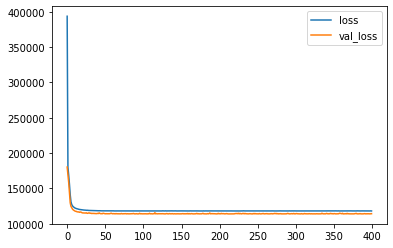

In [20]:
plt.figure(figsize=(22,10))
losses.plot()   # we could continue training, if there is increase in val_loss then it will be overfitting

### Evaluating the model 

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [22]:
predictions=model.predict(X_test)

In [23]:
mean_absolute_error(predictions,y_test)

114151.42459731868

In [24]:
df['price'].mean() # Seeing the previous cell and comparing with the mean price of the house we get to know that prediction model is not upto to the standard

540296.5735055795

In [25]:
explained_variance_score(y_test,predictions)

0.6596124021590883

### Scatter plot to check prdictions with actual labelled output

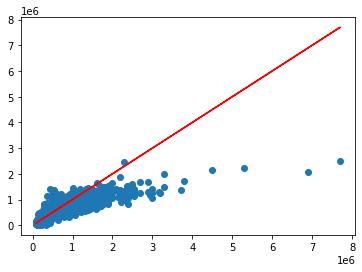

In [26]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
# This shows that the outliers have hurt the model predictions thats why prediction were off and we could observe that house below 3 Lac our predictions were very good

In [27]:
# prediction on new house
single_house=df.drop('price',axis=1).iloc[0] # getting single row of your data andf predicting
single_house=single_house.drop(labels=['id', 'zipcode','date'])
single_house

bedrooms               3
bathrooms            1.0
sqft_living         1180
sqft_lot            5650
floors               1.0
waterfront             0
view                   0
condition              3
grade                  7
sqft_above          1180
sqft_basement          0
yr_built            1955
yr_renovated           0
lat              47.5112
long            -122.257
sqft_living15       1340
sqft_lot15          5650
year                2014
month                 10
Name: 0, dtype: object

In [28]:
#single_house=single_house.values . This is done to convert to numpy array as model takes in arrays only
single_house1=scaler.transform(single_house.values.reshape(-1,19))

In [29]:
model.predict(single_house1)

array([[268033.4]], dtype=float32)